## Simple example for how to use BO with CIQ on Hartmann6
You have to install the `ciq_bo` module and its dependencies before running this notebook

In [1]:
%set_env CUDA_VISIBLE_DEVICES = 0

env: CUDA_VISIBLE_DEVICES=0


In [2]:
import matplotlib.pyplot as plt
import torch
from botorch.test_functions import Hartmann

from ciq_bo import ThompsonSampling

In [3]:
hartmann = Hartmann(dim=6)
lb, ub = hartmann.bounds[0, :], hartmann.bounds[1, :]

## Settings

In [4]:
n_runs = 30
n_init = 10
batch_size = 5
n_iter = 18
n_evals = n_init + batch_size * n_iter
print(n_evals)

100


## TS with Cholesky of size 5000 on the GPU

In [5]:
ts_chol = ThompsonSampling(
    f=hartmann,
    lb=lb,
    ub=ub,
    n_init=n_init,
    max_evals=n_evals,
    batch_size=batch_size,
    jitter=1e-4,
    n_discrete_points=5000,
    use_ciq=False,  # Uses Cholesky
    dtype=torch.float32,
    device=torch.device("cuda"),  # Set to torch.device("cpu") if you don't have a GPU
    verbose=True,
)

fx_chol = ts_chol.optimize()

Iteration: 15, Best value = -1.468e+00
Iteration: 20, Best value = -1.468e+00
Iteration: 25, Best value = -1.468e+00
Iteration: 30, Best value = -1.468e+00
Iteration: 35, Best value = -1.468e+00
Iteration: 40, Best value = -2.481e+00
Iteration: 45, Best value = -2.481e+00
Iteration: 50, Best value = -2.481e+00
Iteration: 55, Best value = -2.977e+00
Iteration: 60, Best value = -2.977e+00
Iteration: 65, Best value = -2.977e+00
Iteration: 70, Best value = -2.977e+00
Iteration: 75, Best value = -2.977e+00
Iteration: 80, Best value = -2.977e+00
Iteration: 85, Best value = -3.099e+00
Iteration: 90, Best value = -3.099e+00
Iteration: 95, Best value = -3.099e+00
Iteration: 100, Best value = -3.099e+00


## TS with CIQ of size 5000 on the GPU

In [6]:
ts_ciq = ThompsonSampling(
    f=hartmann,
    lb=lb,
    ub=ub,
    n_init=n_init,
    max_evals=n_evals,
    batch_size=batch_size,
    jitter=1e-4,
    n_discrete_points=5000,
    max_preconditioner_size=50,  # Increase if you have convergence issues
    num_ciq_samples=15,  # 15 is usually enough
    max_minres_iterations=200,  # Increase if you have convergence issues
    minres_tolerance=1e-3,
    use_ciq=True,
    use_keops=False,  # Turn on if you run out of memory
    dtype=torch.float32,
    device=torch.device("cuda"),  # CIQ is much faster on the GPU
    verbose=True,
)

fx_ciq = ts_ciq.optimize()

Iteration: 15, Best value = -8.446e-01
Iteration: 20, Best value = -8.446e-01
Iteration: 25, Best value = -8.446e-01
Iteration: 30, Best value = -1.414e+00
Iteration: 35, Best value = -2.312e+00
Iteration: 40, Best value = -2.394e+00
Iteration: 45, Best value = -2.677e+00
Iteration: 50, Best value = -2.684e+00
Iteration: 55, Best value = -2.687e+00
Iteration: 60, Best value = -2.831e+00
Iteration: 65, Best value = -2.831e+00
Iteration: 70, Best value = -2.831e+00
Iteration: 75, Best value = -3.022e+00
Iteration: 80, Best value = -3.022e+00
Iteration: 85, Best value = -3.022e+00
Iteration: 90, Best value = -3.022e+00
Iteration: 95, Best value = -3.022e+00
Iteration: 100, Best value = -3.104e+00


## TS with CIQ of size 20,000 on the GPU with KeOps

In [7]:
ts_ciq_keops = ThompsonSampling(
    f=hartmann,
    lb=lb,
    ub=ub,
    n_init=n_init,
    max_evals=n_evals,
    batch_size=batch_size,
    jitter=1e-4,
    n_discrete_points=20000,
    max_preconditioner_size=50,  # Increase if you have convergence issues
    num_ciq_samples=15,  # 15 is usually enough
    max_minres_iterations=200,  # Increase if you have convergence issues
    minres_tolerance=1e-3,
    use_ciq=True,
    use_keops=True,  # Required to not run out of memory
    dtype=torch.float32,
    device=torch.device("cuda"),  # CIQ is much faster on the GPU
    verbose=True,
)


fx_ciq_keops = ts_ciq_keops.optimize()

Compiling libKeOpstorchdfa53c6b65 in /home/gpleiss/.cache/pykeops-1.4.1-cpython-37-gpu0/build-libKeOpstorchdfa53c6b65:
       formula: Sum_Reduction(((((Var(0,1,2) * Sqrt(Sum(Square((Var(1,6,0) - Var(2,6,1)))))) + (IntCst(1) + (Var(3,1,2) * Square(Sqrt(Sum(Square((Var(1,6,0) - Var(2,6,1))))))))) * Exp((Var(4,1,2) * Sqrt(Sum(Square((Var(1,6,0) - Var(2,6,1)))))))) * Var(5,1,1)),0)
       aliases: Var(0,1,2); Var(1,6,0); Var(2,6,1); Var(3,1,2); Var(4,1,2); Var(5,1,1); 
       dtype  : float32
... Done.
Iteration: 15, Best value = -1.758e+00
Iteration: 20, Best value = -1.758e+00
Iteration: 25, Best value = -1.789e+00
Iteration: 30, Best value = -2.002e+00
Iteration: 35, Best value = -2.554e+00
Iteration: 40, Best value = -3.107e+00
Iteration: 45, Best value = -3.107e+00
Iteration: 50, Best value = -3.107e+00
Iteration: 55, Best value = -3.133e+00
Iteration: 60, Best value = -3.133e+00
Iteration: 65, Best value = -3.133e+00
Iteration: 70, Best value = -3.157e+00
Iteration: 75, Best value =

## Plot

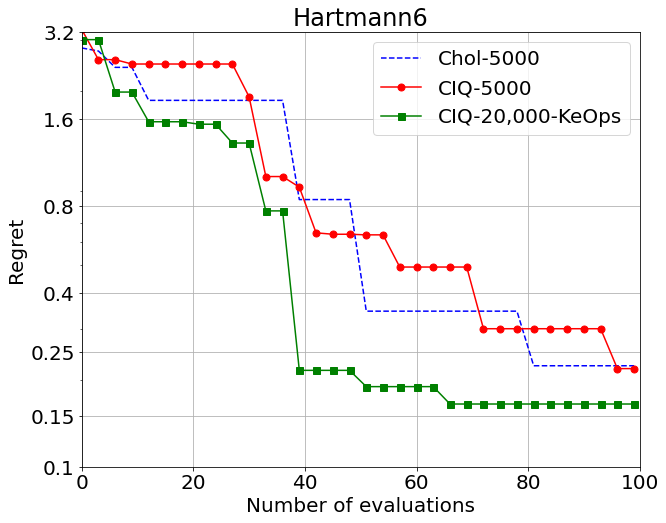

In [8]:
import matplotlib
import numpy as np
from matplotlib import rc

rc("text", usetex=False)


fig = plt.figure(figsize=(10, 8))
matplotlib.rcParams.update({"font.size": 20})

results = [
    (fx_chol.detach().cpu().numpy(), "Chol-5000", "b", "", 14, "--"),
    (fx_ciq.detach().cpu().numpy(), "CIQ-5000", "r", ".", 14, "-"),
    (fx_ciq_keops.detach().cpu().numpy(), "CIQ-20,000-KeOps", "g", "s", 7, "-"),
]

optimum = hartmann.optimal_value

ax = fig.add_subplot(1, 1, 1)
names = []
for res, name, c, m, ms, ls in results:
    names.append(name)
    fx = np.minimum.accumulate(res.ravel()) - optimum
    t = np.arange(len(fx))
    nn = int(len(t) / 30)
    plt.plot(t[0::nn], fx[0::nn], c=c, marker=m, linestyle=ls, markersize=ms)

plt.yscale("log")
plt.title("Hartmann6")
plt.ylabel("Regret")
plt.xlabel("Number of evaluations")
plt.xlim([0, n_init + batch_size * n_iter])
plt.ylim([0.1, 1])
ax.set_yticks([0.1, 0.15, 0.25, 0.4, 0.8, 1.6, 3.2])
ax.set_yticklabels([0.1, 0.15, 0.25, 0.4, 0.8, 1.6, 3.2])
plt.grid(True)

plt.legend(names, loc="upper right")
plt.show()